<a href="https://colab.research.google.com/github/AlinaSayin/WBS_Project_3_Eniac-Are-discounts-useful-/blob/main/Project_3_Eniac_data_cleaning_and_data_quality_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data cleaning


## Loading multiple datasets

### Loading tables via google drive

In [ ]:
import pandas as pd

# orderlines.csv
url = 'https://drive.google.com/file/d/14Y7g5ITyf6LMyPoKc9wr010V9StaCUux/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders.csv
url = 'https://drive.google.com/file/d/1BLEHcP-9fm9Rv7A01H3co2XBMnSr66YC/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

print(path)

# brands.csv
url = 'https://drive.google.com/file/d/1BrNrIY0F1LbyXtyaQygUBXVxQGB3JBqx/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products.csv
url = 'https://drive.google.com/file/d/1UfsHI80cpQqGfsH2g4T4Tsw8cWayOfzC/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

df_list = [orderlines, orders, brands, products]
files = ['orderlines','orders','brands','products']

https://drive.google.com/uc?export=download&id=1BLEHcP-9fm9Rv7A01H3co2XBMnSr66YC


## Data quality

### Missing values

In [ ]:
# we can check missing values column
orderlines.isna().sum()

id                  0
id_order            0
product_id          0
product_quantity    0
sku                 0
unit_price          0
date                0
dtype: int64

In [ ]:
# or for the whole dataframe
orderlines.isna().sum().sum()

0

In [ ]:
orders.isna().sum()

order_id        0
created_date    0
total_paid      5
state           0
dtype: int64

In [ ]:
# the .info() method also tells us the "Non-Null Count" for each column
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [ ]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [ ]:
products.isna().sum()

sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64

In [ ]:
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


### Duplicates

The presence of duplicate rows is generally a sign that the data is not clean, and will deserve further exploration.

In [ ]:
orderlines.duplicated().sum()

0

In [ ]:
orders.duplicated().sum()

0

In [ ]:
brands.duplicated().sum()

0

In [ ]:
products.duplicated().sum()

8746

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


## Cleaning orders

The data consistency check we will do with `orderlines` will involve two steps: 

* the initial and last dates of the orders should be the same
* the sum of `total_paid` on both datasets should be the same

Let's start by transforming the `created_date` of the orders DataFrame and looking for its earliest and latest values:

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [ ]:
# change date datatype
orders['created_date'] = pd.to_datetime(orders['created_date'])

In [ ]:
# earliest value
min(orders['created_date'])

Timestamp('2017-01-01 00:07:19')

In [ ]:
# latest value
max(orders['created_date'])

Timestamp('2018-03-14 13:58:36')

Now we will look at the overall sum of `total_paid` for the orders table:

In [ ]:
sum(orders['total_paid'])

nan

In [ ]:
orders.loc[orders['total_paid'].isna()]

,order_id,created_date,total_paid,state
127701,427314,2017-11-20 18:54:39,NaN,Pending
132013,431655,2017-11-22 12:15:24,NaN,Pending
147316,447411,2017-11-27 10:32:37,NaN,Pending
148833,448966,2017-11-27 18:54:15,NaN,Pending
149434,449596,2017-11-27 21:52:08,NaN,Pending


Since these orders are only a tiny fraction and there's a valid reason why the `total_paid` value is missing, we will simply exclude them from the dataset:

In [ ]:
orders.dropna(inplace=True)

Now the dataset is clean. And the total paid is: 

In [ ]:
orders['total_paid'].isna().sum()

0

In [ ]:
sum(orders['total_paid'])

129159615.06991275

## Cleaning orderlines

In [ ]:
orderlines['date'] = pd.to_datetime(orderlines['date'])

In [ ]:
min(orderlines['date'])
# orders: Timestamp('2017-01-01 00:07:19')

Timestamp('2017-01-01 00:07:19')

In [ ]:
max(orderlines['date'])
# orders: Timestamp('2018-03-14 13:58:36')

Timestamp('2018-03-14 13:58:36')

In [ ]:
orderlines.dtypes

id                           int64
id_order                     int64
product_id                   int64
product_quantity             int64
sku                         object
unit_price                  object
date                datetime64[ns]
dtype: object

In [ ]:
# we create a copy of the dataset
ol_temp = orderlines.copy()

# create a new column with the amount of dots in the unit_price column
ol_temp['dots'] = orderlines['unit_price'].str.count('\.') # the backslash 'escapes' the special meaning of '.' in string operations

# show the rows with more than one dot
ol_temp.query('dots > 1')

,id,id_order,product_id,product_quantity,sku,unit_price,date,dots
6,1119115,299544,0,1,APP1582,1.137.99,2017-01-01 01:17:21,2
11,1119126,299549,0,1,PAC0929,2.565.99,2017-01-01 02:07:42,2
15,1119131,299553,0,1,APP1854,3.278.99,2017-01-01 02:14:47,2
43,1119195,299582,0,1,PAC0961,2.616.99,2017-01-01 08:54:00,2
59,1119214,299596,0,1,PAC1599,2.873.99,2017-01-01 09:53:11,2
...,...,...,...,...,...,...,...,...
293862,1649999,452946,0,1,APP2075,2.999.00,2018-03-14 13:03:33,2
293887,1650045,527321,0,1,PAC2148,3.497.00,2018-03-14 13:10:15,2
293889,1650050,527324,0,1,PAC2117,3.075.00,2018-03-14 13:10:56,2
293911,1650088,527342,0,1,APP2492,1.329.00,2018-03-14 13:24:51,2


In [ ]:
# step 1: to remove the dots, we replace them for... nothing
orderlines = orderlines.assign(unit_price_nd = orderlines['unit_price'].str.replace('\.','', regex=True))
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_nd
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,1899
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,39900
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,47405
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,6839
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,2374


In [ ]:
# step 2.1: we first separate all numbers between the part that goes before the
# decimal point (integers) and the part that goes afterwards (deimals)
orderlines['integers'] = orderlines['unit_price_nd'].str[:-2]
orderlines['decimals'] = orderlines['unit_price_nd'].str[-2:]
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_nd,integers,decimals
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,1899,18,99
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,39900,399,00
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,47405,474,05
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,6839,68,39
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,2374,23,74


In [ ]:
# step 2.2: we now concatenate those two parts of the number, with a dot in between
orderlines['new_unit_price'] = orderlines['integers'] + '.' + orderlines['decimals']
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_nd,integers,decimals,new_unit_price
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,1899,18,99,18.99
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,39900,399,00,399.00
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,47405,474,05,474.05
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,6839,68,39,68.39
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,2374,23,74,23.74


We will now try again to convert this column to a numeric data type:

In [ ]:
orderlines['unit_price'] = pd.to_numeric(orderlines['new_unit_price'])
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  float64       
 6   date              293983 non-null  datetime64[ns]
 7   unit_price_nd     293983 non-null  object        
 8   integers          293983 non-null  object        
 9   decimals          293983 non-null  object        
 10  new_unit_price    293983 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 24.7+ MB


In [ ]:
# drop 'auxiliary' columns
orderlines.drop(['unit_price_nd','decimals','integers','new_unit_price'], axis=1, inplace=True)

# create a new column "total_price" by multiplying product_quantity times unit_price
orderlines['total_price'] = orderlines['product_quantity'] * orderlines['unit_price']

# sum of the new column "total_price":
sum(orderlines['total_price'])

128776222.0298095

In [ ]:
orders['total_paid'].sum()

129159615.07000001

In [ ]:
sum(orderlines['total_price']) - orders['total_paid'].sum()

-383393.040190503

## Matching `orders` and `orderlines`



In [ ]:
new_df=orderlines.assign(check_orders = orderlines['id_order'].isin(orders['order_id']))
new_df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True


In [ ]:
orderlines["check_orders"]=orderlines['id_order'].isin(orders['order_id'])
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True


In [ ]:
(
new_df
    .query("check_orders==False")
)

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
5,1119114,295310,0,10,WDT0249,231.79,2017-01-01 01:14:27,2317.90,False
63,1119218,296284,0,1,BNQ0042,699.00,2017-01-01 09:58:35,699.00,False
67,1119223,294806,0,1,APP1849,2558.99,2017-01-01 10:09:15,2558.99,False
69,1119226,294806,0,1,APP1864,2797.99,2017-01-01 10:15:14,2797.99,False
70,1119235,297261,0,1,QNA0177,304.99,2017-01-01 10:17:59,304.99,False
...,...,...,...,...,...,...,...,...,...
275665,1621177,244328,0,1,OWC0260,349.00,2018-02-20 13:00:45,349.00,False
280055,1628699,261391,0,1,APP2352,3343.00,2018-02-27 11:43:25,3343.00,False
280352,1629247,287797,0,1,SYN0182,484.11,2018-02-27 19:16:26,484.11,False
280856,1630150,261391,0,1,SAT0091,44.99,2018-02-28 12:18:26,44.99,False


In [ ]:
orderlines = (orderlines
              .assign(check_orders = orderlines['id_order'].isin(orders['order_id']))
              .query("check_orders==True"))

In [ ]:
(orders
 .assign(check_orders = orders['order_id'].isin(orderlines['id_order']))
 .query("check_orders==False"))

,order_id,created_date,total_paid,state,check_orders
8,245941,2017-01-01 10:32:23,183.52,Completed,False
65,268629,2017-01-31 11:27:25,73.23,Completed,False
75,272862,2017-04-18 18:17:10,128.99,Pending,False
82,277655,2017-02-01 08:44:55,9.99,Pending,False
83,277994,2017-01-23 18:30:11,52.99,Completed,False
...,...,...,...,...,...
226835,527328,2018-03-14 13:14:12,0.00,Shopping Basket,False
226851,527344,2018-03-14 13:25:21,0.00,Place Order,False
226853,527346,2018-03-14 13:26:14,0.00,Place Order,False
226855,527348,2018-03-14 13:28:18,0.00,Place Order,False


In [ ]:
(orders
 .assign(check_orders = orders['order_id'].isin(orderlines['id_order']))
 .query("check_orders==False")
 ['state'].value_counts())

Place Order        12304
Shopping Basket     9810
Completed             45
Cancelled             41
Pending               13
Name: state, dtype: int64

In [ ]:
orders = (orders
          .assign(check_orders = orders['order_id'].isin(orderlines['id_order']))
          .query("check_orders==True")
         )


In [ ]:
orders['total_paid'].sum()

129130877.18

In [ ]:
orderlines['total_price'].sum()

128659393.77

In [ ]:
orderlines['total_price'].sum() - orders['total_paid'].sum()

-471483.4100000113

## Solving the price mismatch

Merging both datasets and comparing, order by order, the `total_price`.
New merged dataset will be called `orders_info`.


In [ ]:
orderlines_agg = orderlines\
    .groupby('id_order')\
    .agg({'total_price':'sum'})

orders_info = (
    orderlines_agg.merge(orders, how='left', left_on='id_order', right_on='order_id')
    .copy()
)
orders_info

,total_price,order_id,created_date,total_paid,state,check_orders
0,44.99,241319,2017-01-02 13:35:40,44.99,Cancelled,True
1,129.16,241423,2017-11-06 13:10:02,136.15,Completed,True
2,10.77,242832,2017-12-31 17:40:03,15.76,Completed,True
3,77.99,243330,2017-02-16 10:59:38,84.98,Completed,True
4,153.87,243784,2017-11-24 13:35:19,157.86,Cancelled,True
...,...,...,...,...,...,...
204686,42.99,527397,2018-03-14 13:56:38,42.99,Place Order,True
204687,42.99,527398,2018-03-14 13:57:25,42.99,Shopping Basket,True
204688,141.58,527399,2018-03-14 13:57:34,141.58,Shopping Basket,True
204689,19.98,527400,2018-03-14 13:57:41,19.98,Shopping Basket,True


In [ ]:
orders_info = (
orderlines
    .groupby('id_order')
    .agg({'total_price':'sum'})
    .merge(orders, how='left', left_on='id_order', right_on='order_id')
    .copy()
)
orders_info

,total_price,order_id,created_date,total_paid,state,check_orders
0,44.99,241319,2017-01-02 13:35:40,44.99,Cancelled,True
1,129.16,241423,2017-11-06 13:10:02,136.15,Completed,True
2,10.77,242832,2017-12-31 17:40:03,15.76,Completed,True
3,77.99,243330,2017-02-16 10:59:38,84.98,Completed,True
4,153.87,243784,2017-11-24 13:35:19,157.86,Cancelled,True
...,...,...,...,...,...,...
204686,42.99,527397,2018-03-14 13:56:38,42.99,Place Order,True
204687,42.99,527398,2018-03-14 13:57:25,42.99,Shopping Basket,True
204688,141.58,527399,2018-03-14 13:57:34,141.58,Shopping Basket,True
204689,19.98,527400,2018-03-14 13:57:41,19.98,Shopping Basket,True


In [ ]:
orderlines.rename(columns={'id_order':'order_id'}, 
                   inplace=True)
orderlines

,id,order_id,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True
...,...,...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,True
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,True
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,19.98,True
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,19.99,True


In [ ]:
merged_orders = pd.merge(orderlines, orders, on='order_id', how='outer')
merged_orders
merged_orders.head(30)

,id,order_id,product_id,product_quantity,sku,unit_price,date,total_price,check_orders_x,created_date,total_paid,state,check_orders_y
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True,2017-01-01 00:07:19,18.99,Shopping Basket,True
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True,2017-01-01 00:19:45,399.00,Shopping Basket,True
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True,2017-01-01 00:20:57,474.05,Shopping Basket,True
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True,2017-01-01 00:51:40,68.39,Shopping Basket,True
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True,2017-01-01 01:06:38,23.74,Shopping Basket,True
5,1119115,299544,0,1,APP1582,1137.99,2017-01-01 01:17:21,1137.99,True,2017-01-01 01:17:21,1137.99,Shopping Basket,True
6,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,True,2017-01-01 01:51:47,51.48,Completed,True
7,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,True,2017-01-01 01:57:34,18.99,Completed,True
8,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19,True,2017-01-01 02:02:38,72.19,Completed,True
9,1119125,299548,0,5,SPE0132,35.14,2017-01-01 02:02:20,175.70,True,2017-01-01 02:02:20,175.70,Shopping Basket,True


In [ ]:
orders_info['price_difference'] = orders_info['total_price'] - orders_info['total_paid']
orders_info.sort_values('price_difference').tail(30)

,total_price,order_id,created_date,total_paid,state,check_orders,price_difference
20654,164.90,322147,2017-02-10 11:56:59,125.99,Completed,True,38.91
11725,164.90,312311,2017-01-20 00:59:54,125.99,Completed,True,38.91
45940,44.99,349377,2017-04-24 21:42:28,4.99,Pending,True,40.00
8545,164.90,308825,2017-01-13 14:27:46,123.99,Completed,True,40.91
13784,164.90,314570,2017-01-25 09:01:35,122.99,Completed,True,41.91
21347,164.90,322901,2017-02-12 13:25:12,122.99,Place Order,True,41.91
25517,164.90,327363,2017-02-21 22:42:17,122.99,Completed,True,41.91
986,164.90,300474,2017-01-02 12:24:54,119.00,Completed,True,45.90
166458,214768.02,484334,2018-01-07 15:58:26,214714.31,Shopping Basket,True,53.71
54853,13450.87,359083,2017-05-25 13:58:31,13391.86,Shopping Basket,True,59.01


In [ ]:
orders_info['price_difference'].describe()

count    204691.000000
mean         -2.303391
std         297.461827
min      -90898.610000
25%          -0.010000
50%           0.000000
75%           0.000000
max       36159.900000
Name: price_difference, dtype: float64

## Remove outliers



In [ ]:
orders = orders[orders['state'].str.contains("Shopping Basket")== False]
orders = orders[orders['state'].str.contains("Place Order")== False]
orders = orders[orders['state'].str.contains("Cancelled")== False]
orderlines = orderlines.dropna()
orderlines.head()


,id,order_id,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True


In [ ]:
orders.head()

,order_id,created_date,total_paid,state,check_orders
1,241423,2017-11-06 13:10:02,136.15,Completed,True
2,242832,2017-12-31 17:40:03,15.76,Completed,True
3,243330,2017-02-16 10:59:38,84.98,Completed,True
5,245275,2017-06-28 11:35:37,149.00,Completed,True
6,245595,2017-01-21 12:52:47,112.97,Completed,True


In [ ]:
# run the code only once your "orderlines" and "orders" are clean
orderlines.to_csv('orderlines_clean.csv', index=False)
orders.to_csv('orders_clean.csv', index=False)

from google.colab import files
files.download("orderlines_clean.csv")
files.download("orders_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Cleaning products

In [ ]:
print(products.info(), "\n")
print("Missing values:", products.isna().sum(), "\n")
print("Duplicate rows:", products.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB
None 

Missing values: sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64 

Duplicate rows: 8746


#### Duplicates

In [ ]:
products = products.drop_duplicates('sku')
print("Duplicate rows:", products.duplicated('sku').sum())

Duplicate rows: 0


#### Fix data types

In [ ]:
temp_products = products.copy()
temp_products['dots'] = products['promo_price'].str.count('\.')
temp_products.query('dots > 1')
products = products.assign(promo_price_nd = products['promo_price'].str.replace('\.', '', regex=True))
products['integers'] = products['promo_price_nd'].str[:-2]
products['decimals'] = products['promo_price_nd'].str[-2:]
products['new_promo_price'] = products['integers'] + '.' + products['decimals']
products.head()
products['promo_price'] = pd.to_numeric(products['new_promo_price'])
products.info()
products.drop(['integers', 'decimals', 'promo_price_nd', 'new_promo_price'], axis=1, inplace=True)

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


In [ ]:
products['split'] = products.price.str.split('.')
products['first_part'] = products.split.str.get(0)
products.drop(['split'], axis=1, inplace=True)
products.rename(columns= {'first_part':'new_price'}, inplace = True)


In [ ]:
products.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


#### Missing values

In [ ]:
products['price'] = pd.to_numeric(products['price'], errors='coerce')
products.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


In [ ]:
print("Missing values:", products.isna().sum(), "\n")

Missing values: sku              0
name             0
desc             7
price          422
promo_price      0
in_stock         0
type            50
dtype: int64 



In [ ]:
products['price'] = products['price'].fillna(0)
products['desc'] = products['desc'].fillna(0)
products['type'] = products['type'].fillna(0)
print("Missing values:", products.isna().sum(), "\n")

Missing values: sku            0
name           0
desc           0
price          0
promo_price    0
in_stock       0
type           0
dtype: int64 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

#### Save & Download the clean products dataset

In [ ]:
products.to_csv('products_clean.csv', index=False)
from google.colab import files
files.download("products_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Brands

In [ ]:
brands.to_csv('brands_clean.csv', index=False)
files.download("brands_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Part 2: Data Quality (LMS)

In [ ]:
#Nr. 3: Exclude every row in orderlines, whre there is no matching products based on the SKU 
orderlines["check_orders"]=orderlines['id_order'].isin(orders['order_id'])
orderlines.head()

In [ ]:
#load products_clean
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
path = "/content/products_clean.csv"
products_clean = pd.read_csv(path)
products_clean.head()

Mounted at /content/drive


,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/orderlines_clean.csv"
orderlines_clean = pd.read_csv(path)
# drop 'NaN' columns
orderlines_clean = orderlines_clean.dropna()
orderlines_clean.head()

,id,order_id,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True


In [ ]:
path = "/content/orders_clean.csv"
orders_clean = pd.read_csv(path)
# drop 'NaN' columns
#orders_clean = orderlines_clean.dropna()
orders_clean.head()

,order_id,created_date,total_paid,state,check_orders
0,241423,2017-11-06 13:10:02,136.15,Completed,True
1,242832,2017-12-31 17:40:03,15.76,Completed,True
2,243330,2017-02-16 10:59:38,84.98,Completed,True
3,245275,2017-06-28 11:35:37,149.00,Completed,True
4,245595,2017-01-21 12:52:47,112.97,Completed,True


In [ ]:
path = "/content/brands_clean.csv"
brands_clean = pd.read_csv(path)
# drop 'NaN' columns
#orders_clean = orderlines_clean.dropna()
brands_clean.head()

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio


In [ ]:
products_clean["check_products"]=products_clean['sku'].isin(orderlines_clean['sku'])
products_clean = products_clean[products_clean.check_products != False]
products_clean["check_products"].value_counts()

True    7850
Name: check_products, dtype: int64

In [ ]:
products_clean.head()

,sku,name,desc,price,promo_price,in_stock,type,check_products
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,True
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0,13855401,True
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0,1387,True
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0,1230,True
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,True


In [ ]:
orderlines_clean.head()

,id,order_id,product_id,product_quantity,sku,unit_price,date,total_price,check_orders
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,True
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,True
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,True
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,True
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,True


In [ ]:
orders_clean.head()

,order_id,created_date,total_paid,state,check_orders
0,241423,2017-11-06 13:10:02,136.15,Completed,True
1,242832,2017-12-31 17:40:03,15.76,Completed,True
2,243330,2017-02-16 10:59:38,84.98,Completed,True
3,245275,2017-06-28 11:35:37,149.00,Completed,True
4,245595,2017-01-21 12:52:47,112.97,Completed,True


In [ ]:
#Exclude orders with unknown products
orders_clean = (orders_clean
         .assign(check_orders = orderlines_clean['order_id'].isin(orders_clean['order_id']))
         .query("check_orders==True")
         )

In [ ]:
#Exclude orders with unknown products
orderlines_clean = (orderlines_clean
          .assign(check_products = orderlines_clean['sku'].isin(products_clean['sku']))
          .query("check_products==True")
         )

orderlines_clean.tail(10)


,id,order_id,product_id,product_quantity,sku,unit_price,date,total_price,check_orders,check_products
293693,1650130,527362,0,1,APP0367,112.00,2018-03-14 13:34:40,112.00,True,True
293694,1650133,527341,0,1,APP0699,64.99,2018-03-14 13:35:35,64.99,True,True
293695,1650134,527363,0,1,APP0698,9.99,2018-03-14 13:35:51,9.99,True,True
293696,1650135,527364,0,1,APP2491,1329.00,2018-03-14 13:36:13,1329.00,True,True
293697,1650137,526857,0,1,QNA0155,456.99,2018-03-14 13:36:41,456.99,True,True
293698,1650139,527352,0,1,APP0698,9.99,2018-03-14 13:37:12,9.99,True,True
293699,1650141,527365,0,1,APP0927,13.99,2018-03-14 13:38:34,13.99,True,True
293700,1650143,527365,0,1,APP0698,9.99,2018-03-14 13:38:49,9.99,True,True
293701,1650145,527366,0,1,SEA0126,213.99,2018-03-14 13:39:30,213.99,True,True
293702,1650146,527367,0,1,REP0250,69.90,2018-03-14 13:39:34,69.90,True,True


In [ ]:
orderlines_clean.drop(['check_orders', 'check_products'], axis=1, inplace=True)
orderlines_clean.tail(20)

,id,order_id,product_id,product_quantity,sku,unit_price,date,total_price
293723,1650178,527385,0,1,APP0927,13.99,2018-03-14 13:49:21,13.99
293724,1650180,527386,0,1,APP1922,161.00,2018-03-14 13:49:48,161.00
293725,1650181,527387,0,1,APP0698,9.99,2018-03-14 13:50:06,9.99
293726,1650183,527388,0,1,TPL0025,14.99,2018-03-14 13:51:59,14.99
293727,1650184,527389,0,1,APP0698,9.99,2018-03-14 13:52:15,9.99
293728,1650186,525853,0,1,OWC0035-2,71.89,2018-03-14 13:52:18,71.89
293729,1650187,527390,0,1,APP0698,9.99,2018-03-14 13:52:33,9.99
293730,1650189,527391,0,1,SAT0008,49.99,2018-03-14 13:53:31,49.99
293731,1650190,527392,0,1,ZAG0024,34.99,2018-03-14 13:53:44,34.99
293732,1650191,527393,0,1,ELA0026,13.99,2018-03-14 13:53:57,13.99


In [ ]:
orders_clean = orders_clean[orders_clean['state'].str.contains("Pending")== False]
orders_clean.head(20)

,order_id,created_date,total_paid,state,check_orders
6,246018,2017-02-13 23:02:57,211.95,Completed,True
7,246405,2017-11-24 10:01:27,407.96,Completed,True
8,247524,2018-01-09 14:21:34,167.98,Completed,True
10,250275,2017-11-19 22:34:54,54.99,Completed,True
17,253307,2017-09-30 06:11:10,292.04,Completed,True
23,256158,2017-08-05 19:51:20,386.18,Completed,True
25,256679,2017-11-26 10:43:04,20.58,Completed,True
26,256799,2018-02-16 09:44:42,20.97,Completed,True
32,258985,2017-07-31 12:52:38,2264.60,Completed,True
39,260615,2017-01-10 18:59:49,225.16,Completed,True


In [ ]:
#delet any unnecessary columns
del products_clean['type']
del products_clean['check_products']
products_clean.head()

,sku,name,desc,price,promo_price,in_stock
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1


In [ ]:
del orderlines_clean['product_id']

In [ ]:
orderlines_clean = (orderlines_clean
          .assign(check_products = orderlines_clean['sku'].isin(products_clean['sku']))
          .query("check_products==True")
         )
orderlines_clean['check_products'].value_counts()
del products_clean['check_products']
orderlines_clean.shape

(292328, 8)

In [ ]:
del orderlines_clean['check_products']
orderlines_clean.head()

,id,order_id,product_quantity,sku,unit_price,date,total_price
0,1119109,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99
1,1119110,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00
2,1119111,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05
3,1119112,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39
4,1119113,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74


In [ ]:
orderlines_clean = orderlines_clean.assign(unit_price_total = orderlines_clean['unit_price'] * orderlines_clean['product_quantity'])
grouped_orderlines = orderlines_clean.groupby('order_id').sum('unit_price_total')
grouped_orderlines_filtered = grouped_orderlines.loc[:,'unit_price_total']
grouped_orderlines_filtered.head(30)

order_id
241319      44.99
241423     129.16
242832      10.77
243330      77.99
243784     153.87
245275     149.00
245595     105.98
245851      79.99
246018     206.96
246405     275.75
247524     162.99
247643     153.54
250275      51.00
251302     140.99
251688     485.77
251969     590.08
252371      22.99
253220    1609.99
253306     477.68
253307     285.05
254301      28.92
254341      34.98
254441      49.99
254537      32.99
254816     276.84
256158     386.18
256434      39.99
256679      13.59
256799       7.98
257280     260.00
Name: unit_price_total, dtype: float64

In [ ]:
#avg difference bw. total_price and unit_price_total
avg_price = orderlines_clean[['total_price', 'unit_price']].mean(axis = 0)
avg_price
# i don't think this value makes any sense 

total_price    439.019257
unit_price     410.897387
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f124da28750>,
      dtype=object)

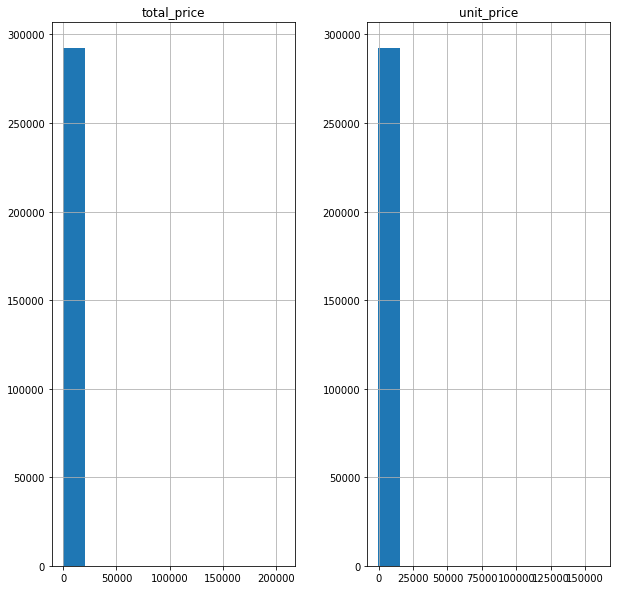

In [ ]:
#What is the distribution of these differences ?
orderlines_clean.hist(['total_price','unit_price'], figsize=(10,10))

In [ ]:
del orders_clean['check_orders']
orders_clean.head()

,order_id,created_date,total_paid,state,check_orders
6,246018,2017-02-13 23:02:57,211.95,Completed,True
7,246405,2017-11-24 10:01:27,407.96,Completed,True
8,247524,2018-01-09 14:21:34,167.98,Completed,True
10,250275,2017-11-19 22:34:54,54.99,Completed,True
17,253307,2017-09-30 06:11:10,292.04,Completed,True


In [ ]:
#orders merged with grouped orderlines 
#Example:
#orderlines = (
   # orderlines_agg.merge(orders, how='left', left_on='id_order', right_on='order_id')
#)
ordersmergedorderslines = orders_clean.merge(grouped_orderlines_filtered, how= 'left', left_on='order_id', right_on='order_id')
ordersmergedorderslines.head()

,order_id,created_date,total_paid,state,check_orders,unit_price_total
0,246018,2017-02-13 23:02:57,211.95,Completed,True,206.96
1,246405,2017-11-24 10:01:27,407.96,Completed,True,275.75
2,247524,2018-01-09 14:21:34,167.98,Completed,True,162.99
3,250275,2017-11-19 22:34:54,54.99,Completed,True,51.00
4,253307,2017-09-30 06:11:10,292.04,Completed,True,285.05


In [ ]:
#rearrange ordersmergedorderslines
ordersmergedorderslines_1 = ordersmergedorderslines.reindex(columns=['order_id', 'created_date', 'state', 'total_paid', 'unit_price_total'])
ordersmergedorderslines_1.head()

,order_id,created_date,state,total_paid,unit_price_total
0,246018,2017-02-13 23:02:57,Completed,211.95,206.96
1,246405,2017-11-24 10:01:27,Completed,407.96,275.75
2,247524,2018-01-09 14:21:34,Completed,167.98,162.99
3,250275,2017-11-19 22:34:54,Completed,54.99,51.00
4,253307,2017-09-30 06:11:10,Completed,292.04,285.05


In [ ]:
#avg difference bw. total_paid and unit_price_total
avg_price_1 = ordersmergedorderslines_1[['total_paid', 'unit_price_total']].mean(axis = 0)
avg_price_1


total_paid          337.578721
unit_price_total    333.122459
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f124d46f710>,
      dtype=object)

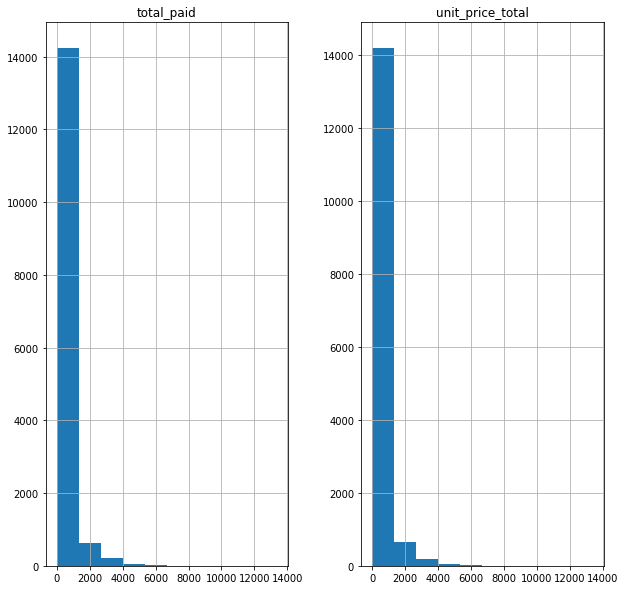

In [ ]:
#What is the distribution of these differences?
ordersmergedorderslines_1.hist(['total_paid','unit_price_total'], figsize=(10,10))

In [ ]:
#difference between total_paid','unit_price_total
ordersmergedorderslines_1['difference'] = ordersmergedorderslines_1['total_paid'] - ordersmergedorderslines_1['unit_price_total']
ordersmergedorderslines_1.head(20)


,order_id,created_date,state,total_paid,unit_price_total,difference
0,246018,2017-02-13 23:02:57,Completed,211.95,206.96,4.99
1,246405,2017-11-24 10:01:27,Completed,407.96,275.75,132.21
2,247524,2018-01-09 14:21:34,Completed,167.98,162.99,4.99
3,250275,2017-11-19 22:34:54,Completed,54.99,51.00,3.99
4,253307,2017-09-30 06:11:10,Completed,292.04,285.05,6.99
5,256158,2017-08-05 19:51:20,Completed,386.18,386.18,0.00
6,256679,2017-11-26 10:43:04,Completed,20.58,13.59,6.99
7,256799,2018-02-16 09:44:42,Completed,20.97,7.98,12.99
8,258985,2017-07-31 12:52:38,Completed,2264.60,2258.01,6.59
9,260615,2017-01-10 18:59:49,Completed,225.16,218.17,6.99


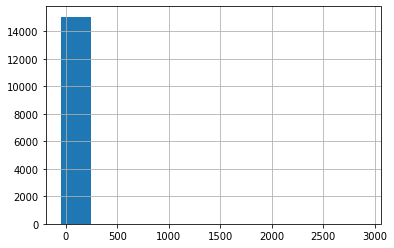

In [ ]:
#plot the #difference between total_paid','unit_price_total = aka ordersmergedorderslines_1['difference']
ordersmergedorderslines_1['difference'].hist()

In [ ]:
ordersmergedorderslines_1['difference'].describe()

count    15085.000000
mean         4.629747
std         27.354632
min        -45.900000
25%          0.000000
50%          4.990000
75%          6.990000
max       2909.230000
Name: difference, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f124d9a7150>,
      dtype=object)

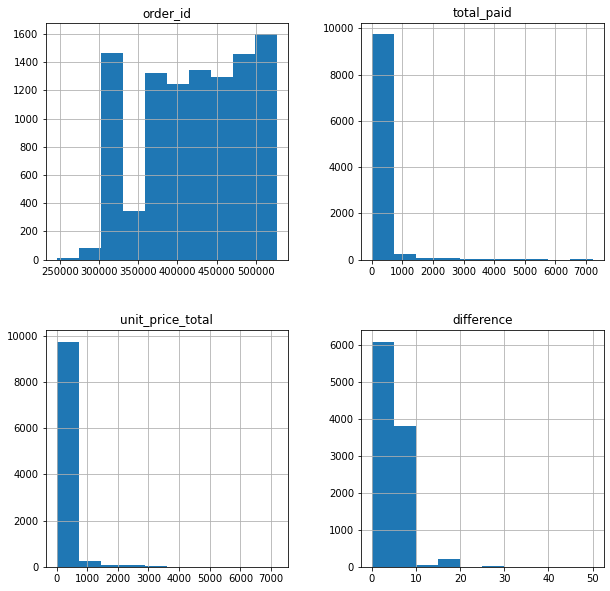

In [ ]:
ordersmergedorderslines_1.query("0.02 < difference < 50").hist(figsize= (10,10))

In [ ]:
#orderlines_clean.head()
products_clean.head()

,sku,name,desc,price,promo_price,in_stock
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1


In [ ]:
#difference between orderlines.unit_price with products.price
diff_orderlines_products_price = products_clean['price'] - orderlines_clean['unit_price']
diff_orderlines_products_price.head(20)

0       41.00
1     -340.00
2     -415.05
3      -43.39
4       11.25
5    -1092.99
6         NaN
7       18.00
8        1.81
9       -0.14
10   -2530.99
11        NaN
12      18.01
13      69.01
14   -3258.99
15     -34.89
16    -167.49
17       9.09
18     -28.00
19     -77.99
dtype: float64

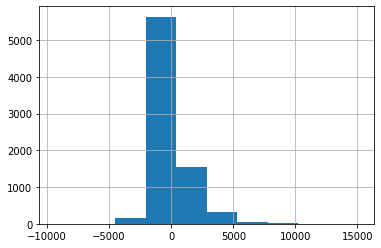

In [ ]:
# hist of #difference between orderlines.unit_price with products.price
diff_orderlines_products_price.hist()

In [ ]:
pd.set_option("display.max_colwidth", 200)
pd.set_option('display.max_rows', 1000)
products_clean.head(5)

,sku,name,desc,price,promo_price,in_stock
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,589.996,0
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.898,0
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,229.997,0
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pro (2006/07/08).,34.99,31.99,1
